In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display # type: ignore
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib as mpl
from IPython.display import HTML
from time import time
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts()

In [2]:
all_sheets = pd.read_excel("studentcourses.xlsx", sheet_name=None, engine='openpyxl')
print("All sheets :", list(all_sheets.keys()))
for sheet_name, df in all_sheets.items():
	print({sheet_name})
	print(df.head())

All sheets : ['علوم طبية ', 'صيدلة وطب اسنان', 'العلوم الادارية', 'الهندسة', 'حاسب الي']
{'علوم طبية '}
   Unnamed: 0  Unnamed: 1                      Unnamed: 2        Unnamed: 3  \
0         NaN  1105312002  عبدالمجيد علي عبدالرحمن الشاوي  السجلات الطبية-2   
1         NaN  1105311013          سالم سليمان دهش الشمري  السجلات الطبية-2   
2         NaN  1105312004        احمد عبدالله صالح الحربي  السجلات الطبية-2   
3         NaN  1105321021      يوسف عبدالله سليمان المهوس  السجلات الطبية-2   
4         NaN  1105312011          سطام بندر جايز المطيري  السجلات الطبية-2   

   Unnamed: 4        Unnamed: 5 Unnamed: 6  Unnamed: 7  
0      110501  المهارات اللغوية   ARAB 101      211637  
1      110501  المهارات اللغوية   ARAB 101      211637  
2      110511    التحرير العربي   ARAB 102      111647  
3      110511    التحرير العربي   ARAB 102      211647  
4      110511    التحرير العربي   ARAB 102      211647  
{'صيدلة وطب اسنان'}
     م    رقم الطالب                           اسم الطالب  

In [3]:
#data cleaning 
for sheet_name, df in all_sheets.items():
    df.columns = ['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']
    all_sheets[sheet_name] = df  
df = all_sheets 
df = pd.concat(df.values(), ignore_index=True)


In [4]:
#combine all sheets into one file
combined_df = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    combined_df = pd.concat([combined_df, df], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)
#remove duplicates & clean it 
combined_df.drop_duplicates(inplace=True)  
combined_df.drop(columns=['م'], inplace=True) 

# Display the first 5 rows of the combined DataFrame
print(combined_df.head()) 
#save into the same excel file
#display the null values
combined_df.to_excel("combined_studentcourses.xlsx", header=1,index=False, engine='openpyxl')

     رقم الطالب                      اسم الطالب            التخصص رقم المقرر  \
0  1105312002.0  عبدالمجيد علي عبدالرحمن الشاوي  السجلات الطبية-2   110501.0   
1  1105311013.0          سالم سليمان دهش الشمري  السجلات الطبية-2   110501.0   
2  1105312004.0        احمد عبدالله صالح الحربي  السجلات الطبية-2   110511.0   
3  1105321021.0      يوسف عبدالله سليمان المهوس  السجلات الطبية-2   110511.0   
4  1105312011.0          سطام بندر جايز المطيري  السجلات الطبية-2   110511.0   

         اسم المقرر رمز المقرر رقم الشعبة  
0  المهارات اللغوية   ARAB 101   211637.0  
1  المهارات اللغوية   ARAB 101   211637.0  
2    التحرير العربي   ARAB 102   111647.0  
3    التحرير العربي   ARAB 102   211647.0  
4    التحرير العربي   ARAB 102   211647.0  


C:\Users\hp\AppData\Local\Temp\ipykernel_16368\3873802463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=filtered_values,
C:\Users\hp\AppData\Local\Temp\ipykernel_16368\3873802463.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(reshaped_courses, rotation=0, ha='right')


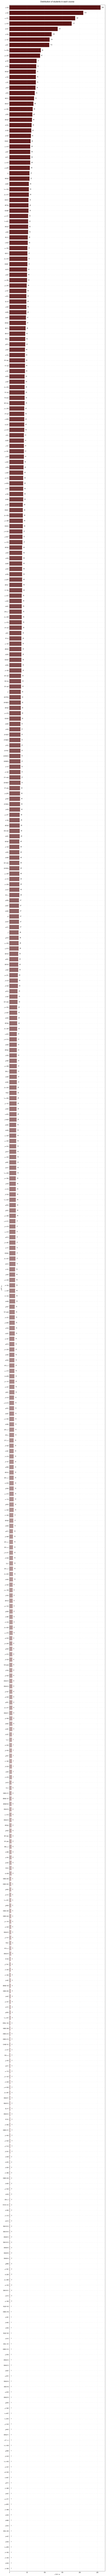

In [5]:
# The number of students in each course
course_counts = combined_df['رمز المقرر'].value_counts()
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.unicode_minus'] = False
reshaped_courses = [get_display(arabic_reshaper.reshape(str(course))) for course in course_counts.index]
darkRED_gradient = sns.light_palette("#660708", n_colors=len(course_counts), reverse=True)
plt.figure(figsize=(12, len(course_counts)*0.6)) 
filtered_values = course_counts.values[course_counts.values != 0]
ax = sns.barplot(x=filtered_values, 
                 y=reshaped_courses, 
                 palette=darkRED_gradient, 
                 orient='h')
plt.title("Distribution of students in each course", fontsize=16, pad=20)
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الطلاب")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("رمز المقرر")), fontsize=12)
for i, (value, name) in enumerate(zip(course_counts.values, reshaped_courses)):
    ax.text(value + 3, i, f'{value}', 
            va='center', ha='left', 
            fontsize=10, color='black')
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.3, alpha=0.7)
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.3, alpha=0.7)
plt.subplots_adjust(left=0.2, right=0.5)
ax.set_yticklabels(reshaped_courses, rotation=0, ha='right')
plt.tight_layout()
plt.show()

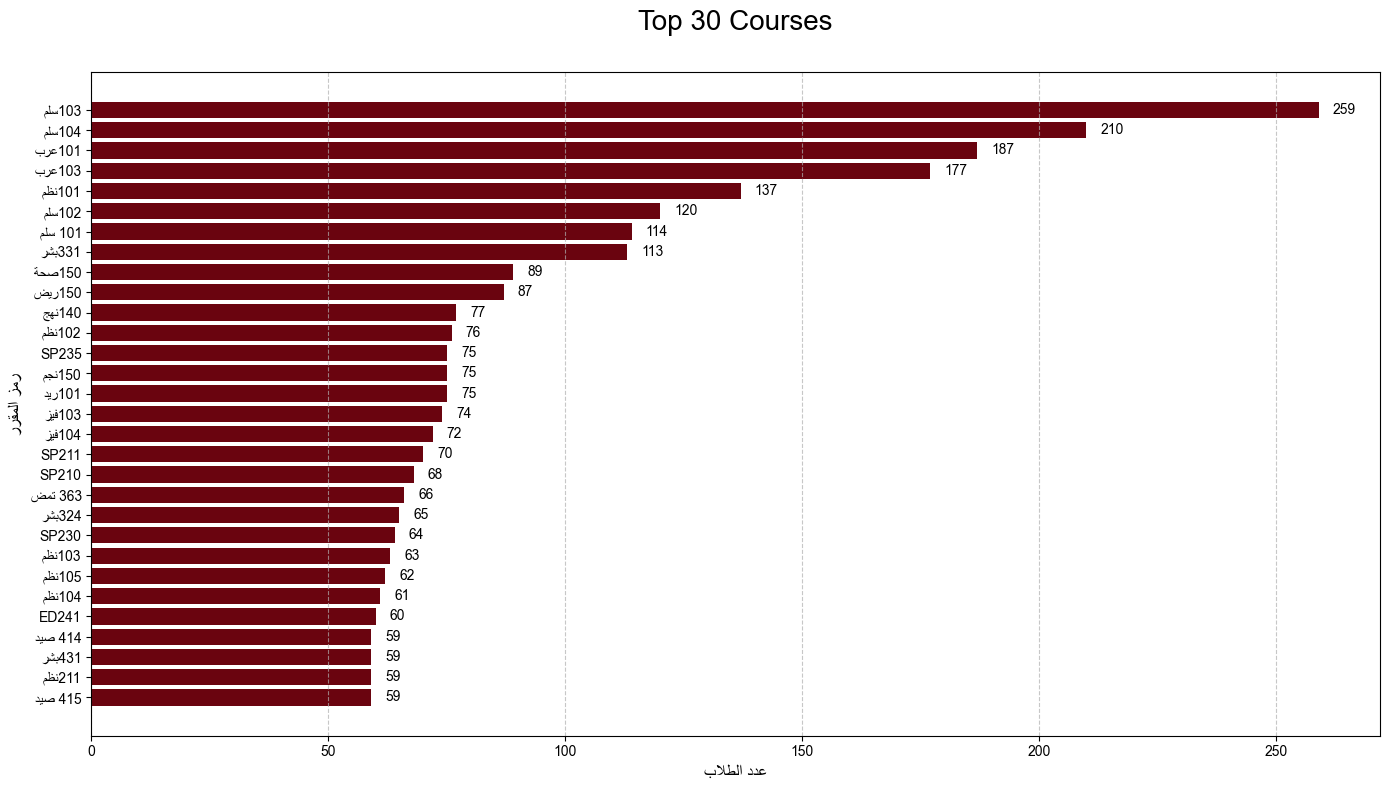

In [6]:
# display the top 30 courses
top_30_courses = course_counts.head(30)   
mpl.rcParams['font.family'] = 'Arial' 
top_30_course_names = [get_display(arabic_reshaper.reshape(str(course))) for course in top_30_courses.index]
plt.figure(figsize=(14, 8))
bars = plt.barh(top_30_course_names, top_30_courses.values, color='#6a040f')  
plt.title('Top 30 Courses', fontsize=20, pad=30)
plt.xlabel(get_display(arabic_reshaper.reshape('عدد الطلاب')), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape('رمز المقرر')), fontsize=12)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 3, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center', ha='left', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


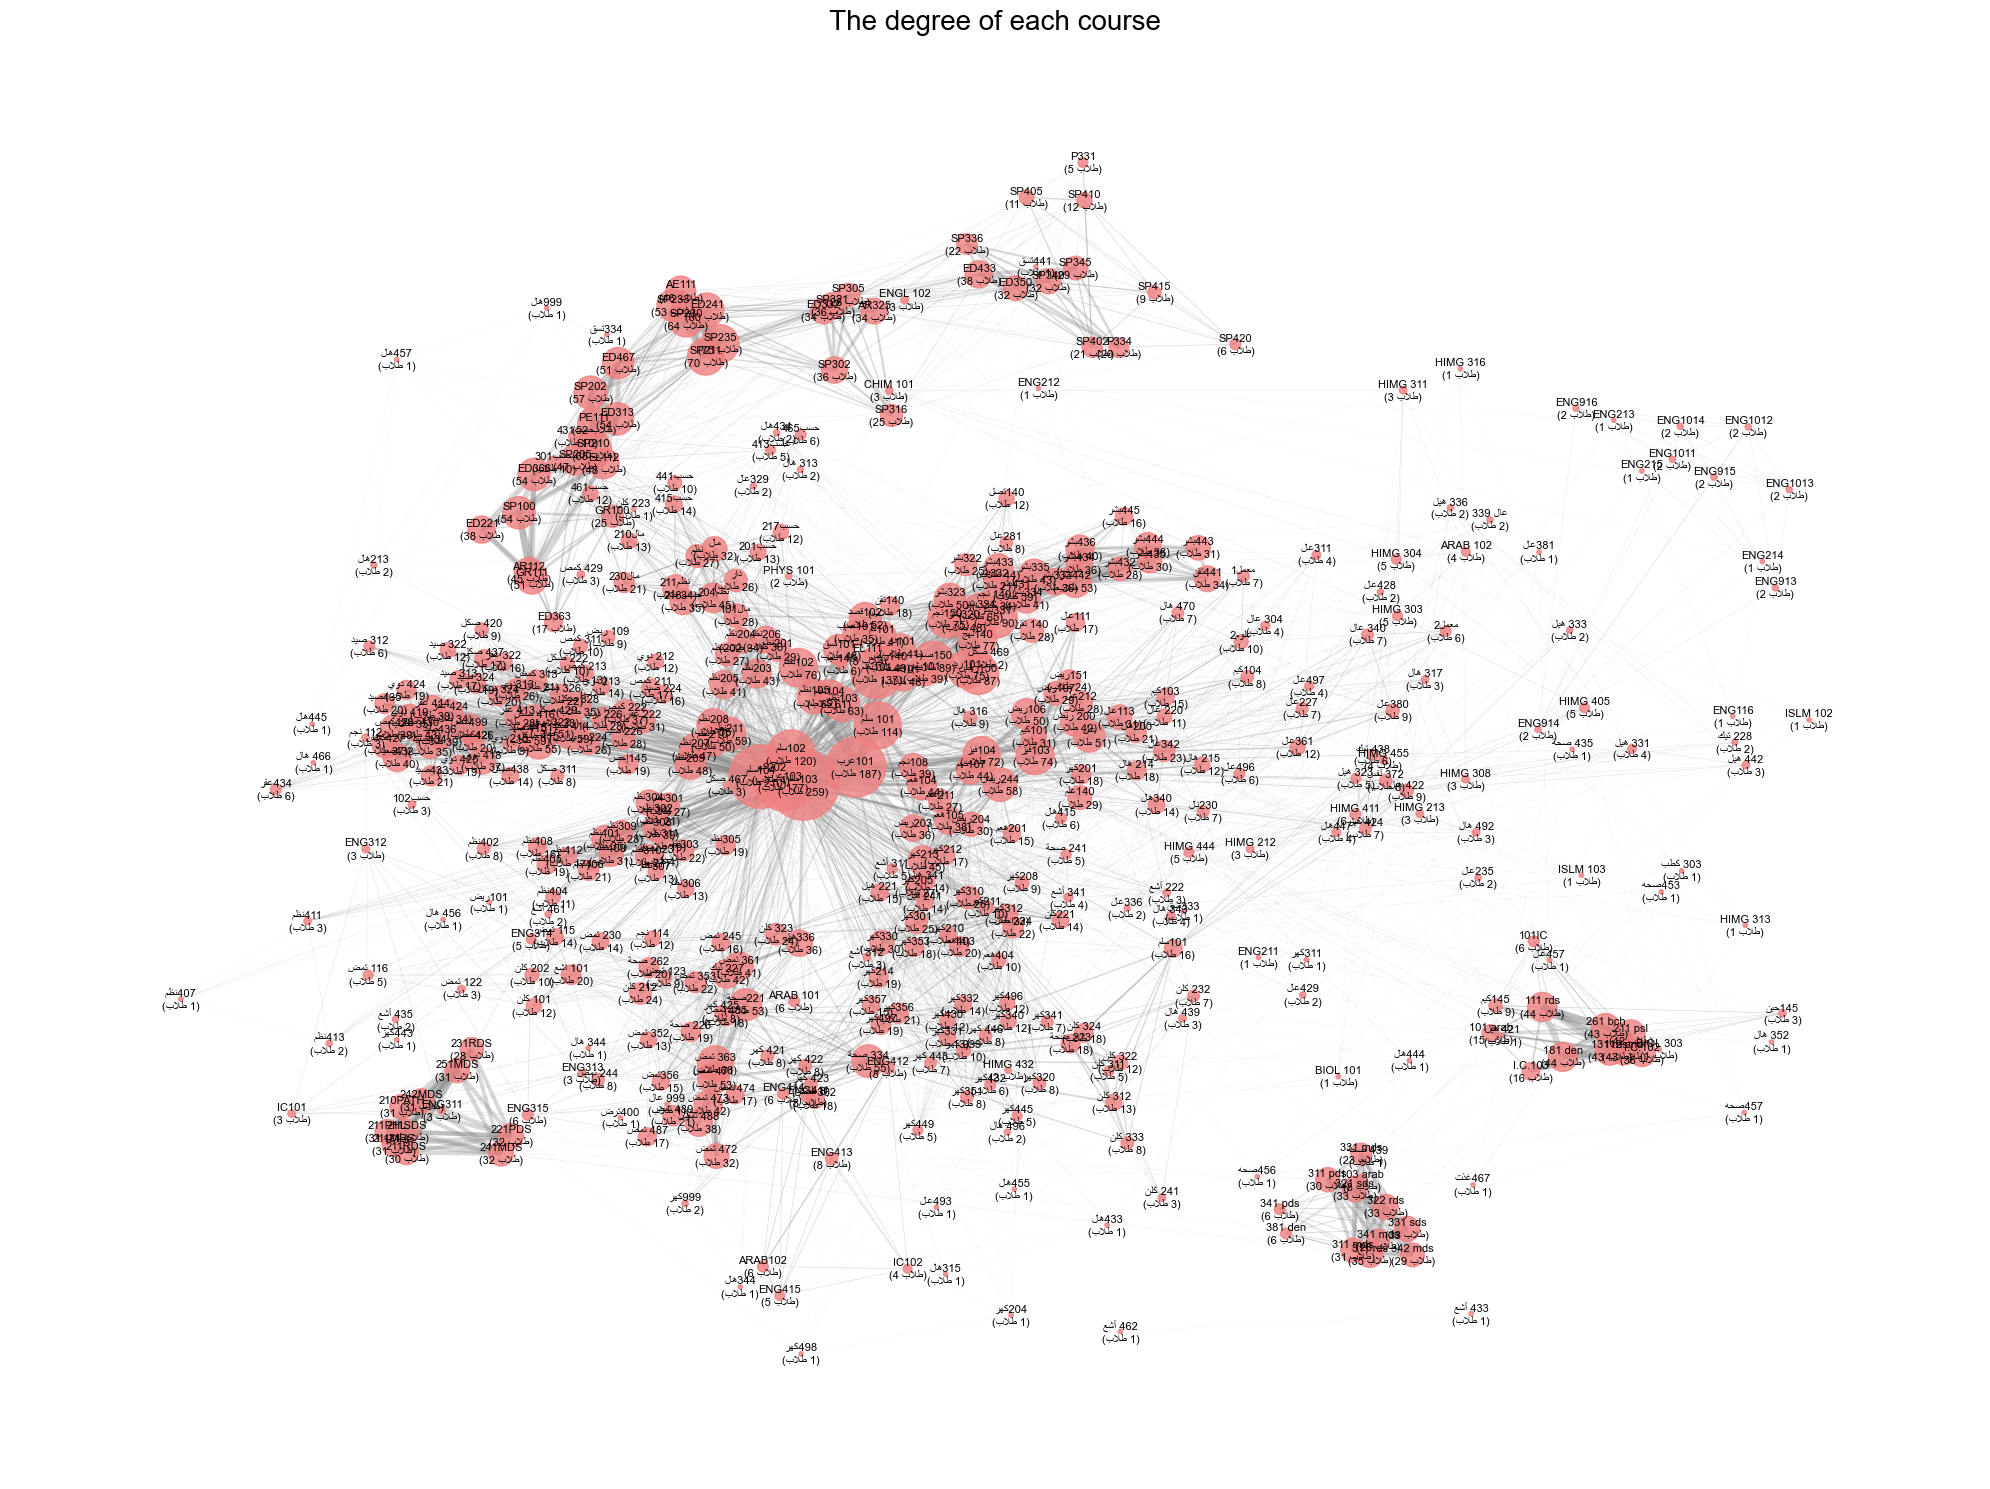

In [7]:
#Ensure the data which we use 
combined_df = pd.read_excel("combined_studentcourses.xlsx")

g = nx.Graph()
course_students = defaultdict(set)

for _, row in combined_df.iterrows():
    student = str(row.get('رقم الطالب', '')).strip()
    course = str(row.get('رمز المقرر', '')).strip()
    if student and course and student != 'nan' and course != 'nan':
        course_students[course].add(student)

for course, students in course_students.items():
    if students:  
        g.add_node(course, size=len(students))

student_courses = defaultdict(list)
for course, students in course_students.items():
    for student in students:
        student_courses[student].append(course)

for courses in student_courses.values():
    for i in range(len(courses)):
        for j in range(i+1, len(courses)):
            if not g.has_edge(courses[i], courses[j]):
                g.add_edge(courses[i], courses[j], weight=1)
            else:
                g.edges[courses[i], courses[j]]['weight'] += 1
if "رمز المقرر" in g:
    g.remove_node("رمز المقرر")
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(g, k=0.5, iterations=50)

node_sizes = [g.nodes[node]['size']*10 for node in g.nodes()]
nx.draw_networkx_nodes(g, pos, node_color='lightcoral', node_size=node_sizes, alpha=0.8)

edge_widths = [d['weight']*0.1 for u, v, d in g.edges(data=True)]
nx.draw_networkx_edges(g, pos, alpha=0.3, width=edge_widths, edge_color='gray')

node_labels = {node: get_display(arabic_reshaper.reshape(f"{node}\n({g.nodes[node]['size']} طلاب)")) 
              for node in g.nodes()}
nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=8, font_family='Arial')  


plt.title(" The degree of each course ", fontsize=20)

plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
import networkx as nx
import time as tm

# Define coloring algorithms to compare 
def run_coloring_algorithm(algorithm_func, g):
    start_time = tm.time()
    
    coloring = algorithm_func(g)
    execution_time = tm.time() - start_time
    num_colors = max(coloring.values()) + 1 if coloring else 0
    return {
            'coloring': coloring,
            'time': execution_time,
            'num_colors': num_colors,
        }      
    
# Define algorithms
algorithms = {
    "greedy (DSATUR)": lambda g: nx.coloring.greedy_color(g, strategy='DSATUR'),
    "greedy (Largest First)": lambda g: nx.coloring.greedy_color(g, strategy='largest_first'),
    "greedy (Random)": lambda g: nx.coloring.greedy_color(g, strategy='random_sequential'),
    "greedy (Smallest First)": lambda g: nx.coloring.greedy_color(g, strategy='smallest_last')  # Added algorithm
}

# Evaluate each algorithm
results = []
for name, algorithm in algorithms.items():
    result = run_coloring_algorithm(algorithm, g)
    results.append({
            'Algorithm': name,
            'Time (s)': result['time'],
            'Number of Periods': result['num_colors'],
            'Coloring': result['coloring']
        })
    print(f"{name}: {result['num_colors']} periods, {result['time']:.4f} seconds")

# Sort results by number of periods then by time
results.sort(key=lambda x: (x['Number of Periods'], x['Time (s)']))

# Display comparison table  
df = pd.DataFrame(results)
df['Time (s)'] = df['Time (s)'].apply(lambda x: f"{x:.4f}")
df = df[['Algorithm', 'Number of Periods', 'Time (s)']] 
df.columns = ['Algorithm', 'Number of Periods', 'Time (s)']
print("\nAlgorithm Comparison :")
print(df.to_string(index=False, justify='center'))

greedy (DSATUR): 19 periods, 1.0332 seconds
greedy (Largest First): 22 periods, 0.0030 seconds
greedy (Random): 25 periods, 0.0040 seconds
greedy (Smallest First): 22 periods, 0.1410 seconds

Algorithm Comparison :
       Algorithm         Number of Periods Time (s)
        greedy (DSATUR)         19          1.0332 
 greedy (Largest First)         22          0.0030 
greedy (Smallest First)         22          0.1410 
        greedy (Random)         25          0.0040 


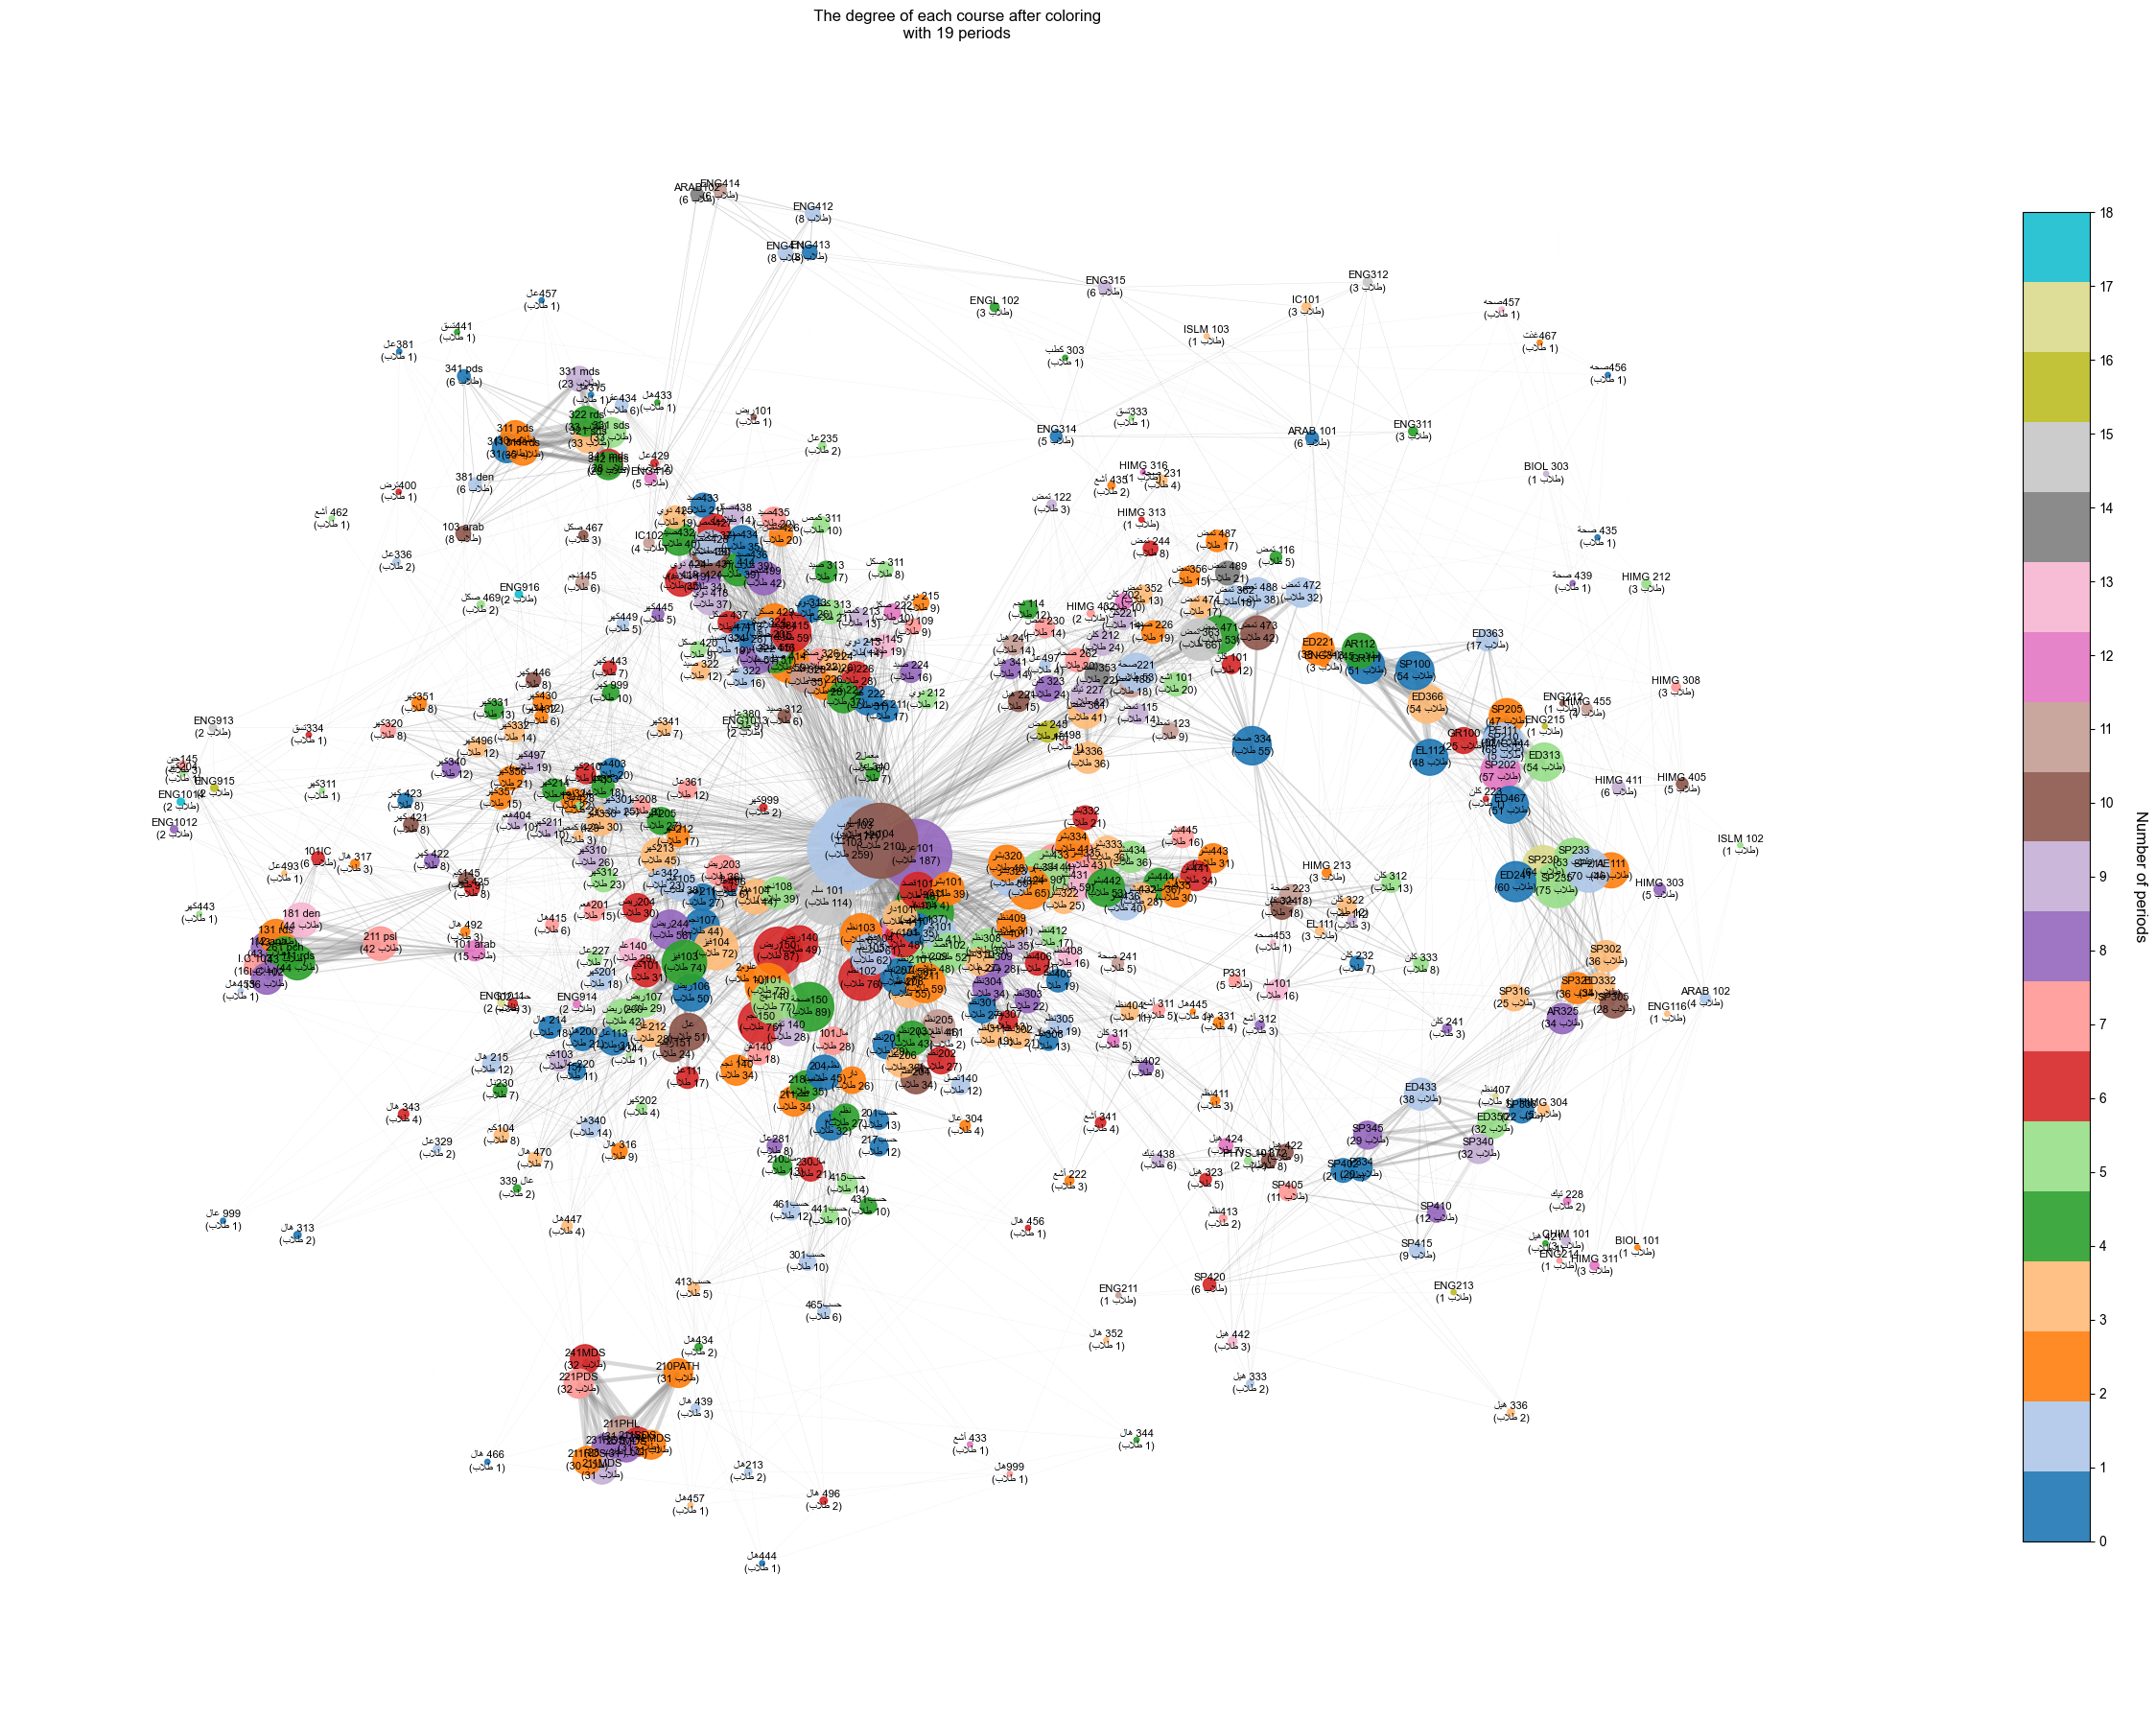

In [9]:
G = g.copy()  
for node in G.nodes():
    if G.nodes[node]['size'] == 1:
        if not G.has_edge(node, node):
            G.add_edge(node, node, weight=0.1)

coloring = nx.coloring.greedy_color(G, strategy='DSATUR')
num_colors = max(coloring.values()) + 1

plt.figure(figsize=(25, 18), dpi=100)
plt.rcParams['font.family'] = 'Arial'  

pos = nx.spring_layout(G, k=0.5, iterations=50)  
cmap = ListedColormap(plt.cm.tab20.colors[:num_colors])

node_sizes = [G.nodes[node]['size']*15 for node in G.nodes()]
nodes = nx.draw_networkx_nodes(G, pos, node_color=list(coloring.values()),
                             cmap=cmap, node_size=node_sizes, alpha=0.9)

edge_widths = [d['weight']*0.1 for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.3, width=edge_widths, edge_color='gray')

node_labels = {node: get_display(arabic_reshaper.reshape(f"{node}\n({G.nodes[node]['size']} طلاب)")) 
              for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_family='Arial')

cbar = plt.colorbar(nodes, ticks=range(num_colors), shrink=0.8)
cbar.set_label(('Number of periods'),rotation=270, labelpad=25, fontsize=12)

plt.title(f" The degree of each course after coloring \n with {num_colors} periods ")

plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
#Details of the network graph
print("Details of the network graph:")
print(f"Number of courses (nodes): {g.number_of_nodes()}")
print(f"Number of edges :  {g.number_of_edges()}")
print(f"Number of periods (Number of colors): {num_colors}")
print(f"Number of students in the biggest course:  {course_counts.max()}")
print(f"Number of students in the smallest course: {course_counts.min()}")



Details of the network graph:
Number of courses (nodes): 479
Number of edges :  5258
Number of periods (Number of colors): 19
Number of students in the biggest course:  259
Number of students in the smallest course: 1


In [11]:
for course in course_students:
    if course not in coloring:
        coloring[course] = max(coloring.values()) + 1 if coloring else 0

In [12]:
#Export the course names to a dictionary
course_names = {}
for _, row in combined_df.iterrows():
    code = str(row['رمز المقرر']).strip()
    name = str(row['اسم المقرر']).strip()
    if code and name:
        course_names[code] = name
def generate_complete_timetable(course_students):
    # create a dictionary to store the courses and their students
    all_courses = [(course, len(students)) for course, students in course_students.items()]
    # Arrange the courses in descending order based on the number of students
    sorted_courses = sorted(all_courses, key=lambda x: -x[1])
    #divide the courses into 6 days and 4 periods each day
    days = []
    day_periods = defaultdict(list)
    
    for idx, (course, size) in enumerate(sorted_courses):
        day_num = (idx // 24) % 6  
        period_num = (idx % 4) + 1  
        
        if day_num >= len(days):
            days.append(defaultdict(list))
        
        days[day_num][period_num].append((course, size))
    
    return days
def assign_rooms_complete(days_timetable, room_capacity=55, total_rooms=30):
    assignments = []
    room_usage = defaultdict(set)
    
    for day_idx, day in enumerate(days_timetable, 1):
        for period_num, courses in day.items():
            period_key = (day_idx, period_num)
            used_rooms = 0  
            
            for course_code, size in courses:
                remaining_students = size
                
                while remaining_students > 0 and used_rooms < total_rooms:
                    students_in_room = min(remaining_students, room_capacity)
                    remaining_students -= students_in_room
                    room_num = len(room_usage[period_key]) + 1
                    room_name = f"القاعة {room_num}"
                    
                    assignments.append({
                        'اليوم': day_idx,
                        'الفترة': period_num,
                        'القاعة': room_name,
                        'رمز المقرر': course_code,
                        'المقرر': course_names.get(course_code, course_code),
                        'الطلاب': students_in_room,
                        'الإشغال': f"{students_in_room}/{room_capacity}"
                    })
                    
                    room_usage[period_key].add(room_name)
                    used_rooms += 1
                    if used_rooms >= total_rooms:
                        break   
    return pd.DataFrame(assignments)

In [13]:
def generate_html_timetable(df):
    styles = """
    <style>
        .timetable {
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            width: 100%;
            margin: 20px 0;
        }
        .timetable th {
            background-color: #800e13;
            color: white;
            text-align: center;
            padding: 12px;
        }
        .timetable td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        .timetable tr:hover {
            background-color: #ad2831;
        }
        .day-header {
            background-color: #660708  !important;
            color: white !important;
            padding: 10px;
            border-radius: 8px;
        }
        .room-usage {
            font-size: 0.8em;
            color: #38040e;
        }
        .period-1 { background-color: #F5F6F4 ; }  /* light PuBu */
        .period-2 { background-color: #e0e3dd; }
        .period-3 { background-color: #F5F6F4  ; }
        .period-4 { background-color: #e0e3dd; }
        .period-5 { background-color: #F5F6F4; }
        .period-6 { background-color: #e0e3dd ; color: white; }
    </style>
    """
    html_output = f"""<html><head><meta charset="utf-8">{styles}</head><body><h1 style="text-align:center"> Exam timetable </h1>"""
    
    for day in sorted(df['اليوم'].unique()):
        html_output += f"""<h2 class="day-header">اليوم {day}</h2>
        <table class="timetable">
        <tr><th>الفترة</th><th>القاعة</th><th>رمز المقرر</th><th>المقرر</th><th>عدد الطلاب</th></tr>"""
        
        day_df = df[df['اليوم'] == day]
        for period in sorted(day_df['الفترة'].unique()):
            period_df = day_df[day_df['الفترة'] == period]
            first_row = True
            period_class = f"period-{period}"
            for _, row in period_df.iterrows():
                html_output += f"""
                <tr class="{period_class}">
                    {"<td rowspan='"+str(len(period_df))+"'>"+str(period)+"</td>" if first_row else ""}
                    <td>{row['القاعة']}</td>
                    <td>{row['رمز المقرر']}</td>
                    <td>{row['المقرر']}</td>
                    <td>{row['الطلاب']} <span class="room-usage">({row['الإشغال']})</span></td>
                </tr>
                """
                first_row = False
        
        html_output += "</table>"
    
    html_output += "</body></html>"
    return html_output

In [14]:
complete_timetable = generate_complete_timetable(course_students)

input_courses = set(course_students.keys())
output_courses = set()
for day in complete_timetable:
    for period in day.values():
        for course, _ in period:
            output_courses.add(course)

final_df = assign_rooms_complete(complete_timetable)
course_to_remove = "اسم المقرر"  
filtered_df = final_df[final_df['المقرر'] != course_to_remove]


final_df.to_excel('complete_exam_timetable.xlsx', index=False)

html_output = generate_html_timetable(final_df)
with open('complete_exam_timetable.html', 'w', encoding='utf-8') as f:
    f.write(html_output)

from IPython.display import HTML
display(HTML(html_output))

In [27]:
from neo4j import GraphDatabase

URI = "bolt://localhost:7687"
USER = "neo4j"
PASSWORD = "12345678"

try:
    driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))
    print("successfully connected to Neo4j database!")
    driver.close()
except Exception as e:
    print(f" Error in connection : {e}")

successfully connected to Neo4j database!


In [28]:
from neo4j import GraphDatabase

URI = "bolt://localhost:7687"  
USER = "neo4j"
PASSWORD = "12345678"  

driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))

In [29]:
def clear_database(tx):
    tx.run("MATCH (n) DETACH DELETE n")

with driver.session() as session:
    session.execute_write(clear_database)

In [30]:
def save_graph_to_neo4j(driver, g):
    with driver.session() as session:
        for node in g.nodes():
            session.run(
                "MERGE (c:Course {code: $code, name: $name, students: $students})",
                code=node,
                name=course_names.get(node, ""), 
                students=g.nodes[node]['size']
            )
    
        for u, v, data in g.edges(data=True):
            session.run(
                """MATCH (c1:Course {code: $code1})
                   MATCH (c2:Course {code: $code2})
                   MERGE (c1)-[:SHARES_STUDENTS {weight: $weight}]->(c2)""",
                code1=u,
                code2=v,
                weight=data['weight']
            )

save_graph_to_neo4j(driver, g)

In [31]:
def save_coloring_to_neo4j(driver, coloring):
    with driver.session() as session:
        for course, color in coloring.items():
            session.run(
                "MATCH (c:Course {code: $code}) SET c.color = $color, c.period = $period",
                code=course,
                color=color,
                period=color + 1 
            )


save_coloring_to_neo4j(driver, coloring)

In [ ]:
def print_courses_by_period(driver):
    with driver.session() as session:
        result = session.run(
            "MATCH (c:Course) RETURN c.code AS code, c.period AS period ORDER BY period"
        )
        for record in result:
            print(f"Course: {record['code']}, Period: {record['period']}")

print_courses_by_period(driver)

Course: 456صحه, Period: 1
Course: 212 كلن, Period: 1
Course: 103سلم, Period: 1
Course: 422 هيل, Period: 1
Course: 472 تمض, Period: 1
Course: 241 هيل, Period: 1
Course: 202 كلن, Period: 1
Course: 312 كلن, Period: 1
Course: 311 أشع, Period: 1
Course: 112 نجم, Period: 1
Course: 462 أشع, Period: 1
Course: 103 arab, Period: 1
Course: 331 mds, Period: 1
Course: 241MDS, Period: 1
Course: 322 صيد, Period: 1
Course: 419 دوي, Period: 1
Course: 226 دوي, Period: 1
Course: 145كيم, Period: 1
Course: ARAB102, Period: 1
Course: ENG913, Period: 1
Course: ENG215, Period: 1
Course: SP235, Period: 1
Course: ED363, Period: 1
Course: 302نظم, Period: 1
Course: SP405, Period: 1
Course: 210كهر, Period: 1
Course: 999 عال, Period: 1
Course: 313 هال, Period: 1
Course: 380عال, Period: 1
Course: 429عال, Period: 1
Course: 202كهر, Period: 1
Course: 439 هال, Period: 1
Course: 329عال, Period: 1
Course: 456 هال, Period: 1
Course: 215 هال, Period: 1
Course: 317 هال, Period: 1
Course: عال 339, Period: 1
Course: ARAB 101, 

In [33]:
driver.close()

In [34]:
query = """
UNWIND $nodes AS node
MERGE (c:Course {code: node.code})
SET c.name = node.name, c.students = node.students
"""

In [35]:
def get_timetable(driver):
    with driver.session() as session:
        result = session.run(
            "MATCH (c:Course) RETURN c.code AS code, c.name AS name, c.period AS period"
        )
        return pd.DataFrame([dict(record) for record in result])